# Polynomial Regression

This note introduces the **Polynomial Regression** algorithm using `scikit-learn`, explains the step-by-step logic behind how it works, and then demonstrates a from-scratch implementation to show that the core idea is simple and easy to build.

## What is Polynomial Regression?

Polynomial Regression is like drawing the best **curved line** through a set of points.

Instead of fitting a straight line (like in Linear Regression), it fits a curve — using **higher powers of the input feature** (e.g., \\( x^2, x^3 \\), etc.) to better capture patterns in the data.

It’s especially useful when the relationship between the input and output is **nonlinear** — for example, modeling how the speed of a car changes with time under acceleration.

This notebook will:

- Use `scikit-learn` to demonstrate how Polynomial Regression works in practice  
- Explain the logic behind it in an intuitive way  
- Show how to implement the same idea step by step from scratch  

Let’s dive into the details to understand how it works and how to implement it ourselves.

## Preparation

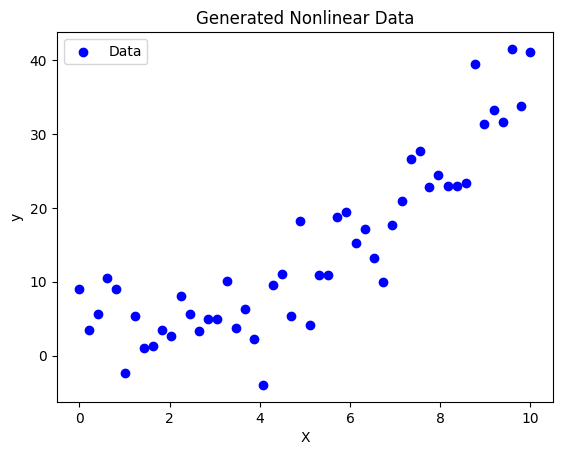

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate some nonlinear data
np.random.seed(0)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 0.5 * X**2 - X + 2 + np.random.randn(50, 1) * 4

plt.scatter(X, y, color='blue', label='Data')
plt.title("Generated Nonlinear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Implement with Scikit-Learn

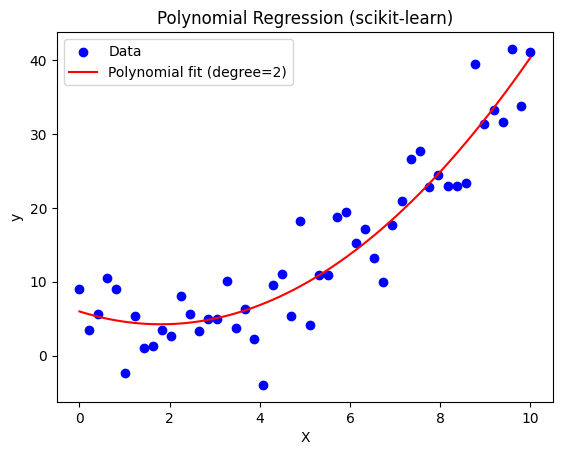

In [ ]:
# Create a 2nd-degree polynomial regression model
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)

# Predict and plot
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', label='Polynomial fit (degree=2)')
plt.title("Polynomial Regression (scikit-learn)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Understanding the Visualization

The curve shown in the plot is the result of fitting a **polynomial equation** to the data.

Each dot is a real data point.  
The green line is the predicted output using the learned polynomial:

$$
\hat{y} = w_0 + w_1 x + w_2 x^2
$$

This equation tells us:

- $w_0$ is the **intercept** (like $b$ in linear regression)  
- $w_1$ controls the **linear slope**
- $w_2$ controls the **curvature**

As the model trains, it adjusts these weights to minimize the prediction error and **fit the best curve** through the data.

> We write the intercept as $( w_0 $) instead of \( b \) because it's included as the **first weight** in the feature vector — this makes it easier to handle in matrix form.

## Behind the Scenes

### 1. Polynomial Features = Curve-Friendly Input

In regular Linear Regression, the prediction looks like:

$$
\hat{y} = w_0 + w_1 x
$$

That’s just a **straight line** — great for linear data, but too simple for curves.

To model **nonlinear patterns**, we expand the input into **polynomial terms**:

$$
x \rightarrow [1, x, x^2, x^3, \dots, x^d]
$$

This means each original input becomes a new row of features:

- $x$ becomes:  
  $[1, x, x^2]$  → if degree = 2  
  $[1, x, x^2, x^3]$  → if degree = 3

Each added power gives the model more **curving ability**.

So now we can model complex shapes like:

- **Parabolas** (degree 2)  
- **Cubics** (degree 3)  
- **Waves** or **wiggles** (degree 4+)

Even though it looks nonlinear in $x$, it’s still **linear in the weights** — and that’s the key idea.

### 2. Degree Depends on the Data

The `degree` you choose controls how **complex** the curve is.

- **Low degree** → simple, smooth curve  
- **High degree** → flexible, wavy curve (but might overfit)

For example, if the true pattern is curved like a bowl, a degree of 2 is usually enough:

$$
[1, x, x^2]
$$

This gives the model enough freedom to bend, without getting too wild.

> Choosing the right degree is a balance:  
> Too low = underfitting, too high = overfitting.

### 3. Same Learning Equation, Just Transformed Input

Once we expand the input, we train the model just like in linear regression — nothing changes in the math!

#### A) Using Gradient Descent

We minimize the cost function step by step:

**Cost function (Mean Squared Error):**

$$
J(\mathbf{w}) = \frac{1}{2n} \sum_{i=1}^n \left( \hat{y}_i - y_i \right)^2
= \frac{1}{2n} \left\| X_{\text{poly}} \mathbf{w} - \mathbf{y} \right\|^2
$$

- $X_{\text{poly}}$ is the matrix of polynomial features  
- $\mathbf{w}$ contains all the weights: $[w_0, w_1, \dots, w_d]$

We compute the gradient:

$$
\nabla J(\mathbf{w}) = \frac{1}{n} X_{\text{poly}}^\top (X_{\text{poly}} \mathbf{w} - \mathbf{y})
$$

Then update the weights:

$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \nabla J(\mathbf{w})
$$

- $\alpha$ is the **learning rate** (controls step size)
- This repeats until the weights converge (or max steps reached)

> We use $ \nabla J(\mathbf{w}) $ instead of separate derivatives like $ \frac{dJ}{dw}, \frac{dJ}{db} $ because all weights — including the intercept — are updated together as a vector.

#### B) Using Closed-Form Solution

If the dataset is small, we can directly **solve for the weights** using the Normal Equation:

$$
\mathbf{w} = (X^\top X)^{-1} X^\top y
$$

- $X$ is the matrix of polynomial features  
- This formula gives the exact weights that minimize error — no iteration needed

> To use this formula, the input features must be **non-redundant** — no column should be a perfect copy or combination of the others. If they are redundant, the matrix $X^\top X$ becomes **singular**, meaning we cannot compute its inverse. In such cases, the closed-form solution fails. Gradient descent can still work, but the solution might not be unique.

However, **polynomial features like $x$, $x^2$, $x^3$ are not redundant** — they are nonlinear transformations and add meaningful complexity to the model. So in this example, we can safely use the closed-form solution.

So the learning process is exactly like linear regression —  
we’re just feeding in **curved features** instead of raw $x$.

> That’s why Polynomial Regression is often called:  
> **Linear Regression in disguise.**

## Let's Code It

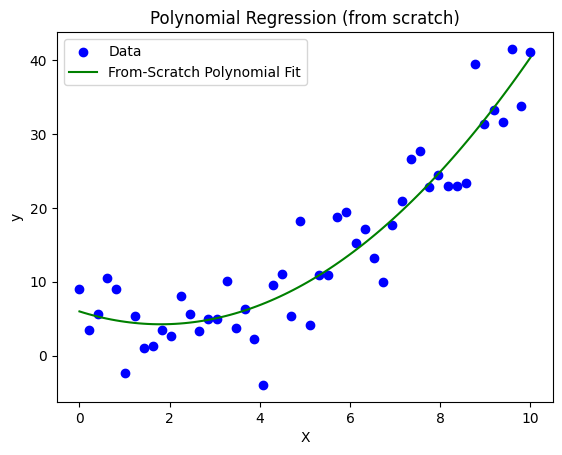

In [ ]:
# Step 1: Create polynomial features manually
def add_polynomial_features(X, degree):
    return np.hstack([X**d for d in range(degree + 1)])

# Step 2: Fit using Normal Equation
class MyPolynomialRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.coef_ = None

    def fit(self, X, y):
        X_poly = add_polynomial_features(X, self.degree)
        # Normal Equation: w = (XᵀX)^(-1) Xᵀy
        self.coef_ = np.linalg.pinv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):
        X_poly = add_polynomial_features(X, self.degree)
        return X_poly @ self.coef_

# Train our custom model
my_model = MyPolynomialRegression(degree=2)
my_model.fit(X, y)
my_y_pred = my_model.predict(X_test)

# Plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test, my_y_pred, color='green', label='From-Scratch Polynomial Fit')
plt.title("Polynomial Regression (from scratch)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## It Works!!

The curved regression line produced by our scratch **Polynomial Regression** implementation closely matches the result from **scikit-learn**.

This confirms that the gradient descent logic — expanding the features, computing the cost, applying the chain rule, and updating the weights — behaves exactly as expected.

We've successfully built **Polynomial Regression** from the ground up!